<a href="https://colab.research.google.com/github/LucilleKaleha/Week_3_Independent_Project/blob/master/W3_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

To work on this project, we will perform the following:

Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Plot appropriate univariate and bivariate summaries recording our observations.

Implement the solution by performing hypothesis testing.

Challenge our solution by providing insights on how we can make improvements.

# 1.1 Question

## 1.1.1 Defining the Question

## 1.1.2 Metric of Success

## 1.1.3 Context

## 1.1.4 Experimental Design

## 1.1.5 Appropriateness of Data

# 1.2 Libraries

In [0]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

# 1.3 The Dataset

## 1.3.1 Creating a Dataframe from the Dataset

In [3]:
# Loading the dataset and Previewing the top 
# 
Autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
# Preview of the bottom o the dataset
Autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


## 1.3.2 Overview of the Data

In [5]:
# Using Pandas profiling to get an overview description of the dataframe

pp.ProfileReport(Autolib)

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


In [0]:
# From the overview we can see that we don't have any missing data
# 
# Let's take a closer at the dataframe below

In [6]:
# GEtting information of the different columns in the dataframe
# 
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [7]:
# Previewing the summary statistics
# 
Autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [8]:
# getting the shape of the dataframe
# 
Autolib.shape
# 
# the dataset has 16,085 rows and 13 columns

(16085, 13)

In [9]:
# checkin the size of the dataset
# 
Autolib.size
# 
# the dataset has 209105 items

209105

In [10]:
# Let's look at the data types
# 
Autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [0]:
autolib = Autolib[Autolib.day_type == 'weekend']
autolib.day_type.unique()

array(['weekend'], dtype=object)

In [0]:
autolib['Postal code'].value_counts()

# 1.4 Data Cleaning

In [11]:
# Checking the column names
Autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [12]:
# Cleaning the column names
# The code below will change all the column names to lower case and replace the spaces 
# 
Autolib.columns = Autolib.columns.str.lower().str.replace(' ', '_')
Autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [13]:
# Checking whether the dataset has any duplicated data
len(Autolib[Autolib.duplicated()])

0

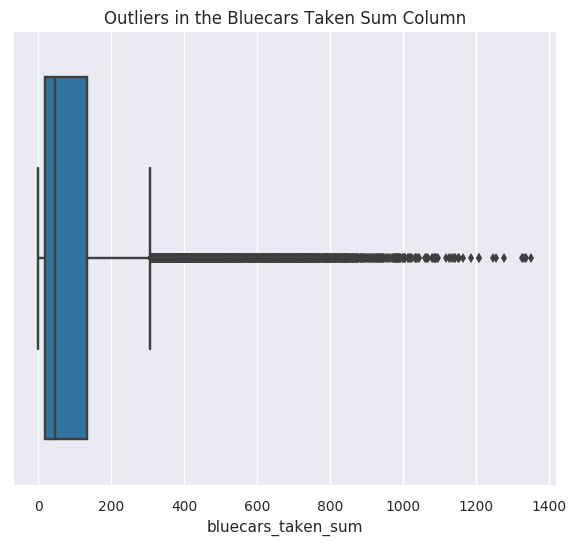

In [23]:
# Checking for outliers
# 
plt.figure(dpi = 100, figsize = (7, 6))
sns.set_style('darkgrid')
sns.boxplot(Autolib['bluecars_taken_sum'])
plt.title('Outliers in the Bluecars Taken Sum Column')
plt.show()


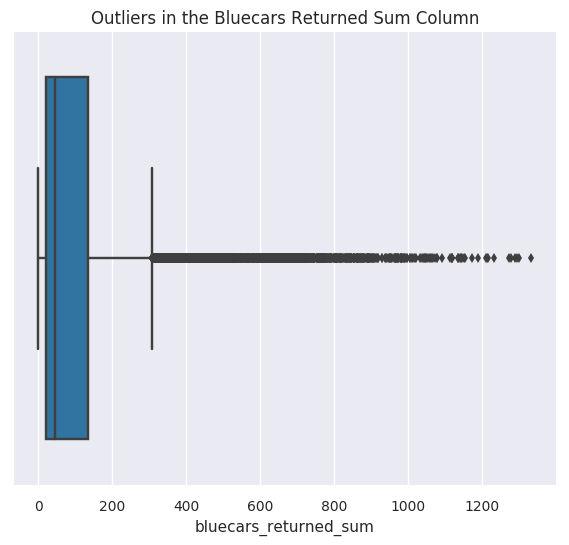

In [24]:
# Checcking for outliers
# 
plt.figure(dpi = 100, figsize = (7, 6))
sns.set_style('darkgrid')
sns.boxplot(Autolib['bluecars_returned_sum'])
plt.title('Outliers in the Bluecars Returned Sum Column')
plt.show()

In [0]:
sns.violinplot()

# 1.5 Univariate Analysis

# New Section

# New Section

# New Section